# **MVP de Machine Learning & Analytics**

##Profs. Tatiana Escovedo (Machine Learnig) e Augusto Baffa (Analytics – Descriptive and Predictive e Advanced Analytics)


##Profs. Hugo Villamizar e Patrick Happ

## Aluno Welton Benedito de Souza

## MVP Análise de dados financeiros das empresas da IBOVESPA aplicando o machine e deep learning



## **1. Definição do Problema**

Na continuação da Sprint I: Análise de Dados e Boas Práticas, o projeto apresentado de aprendizado supervisionado é composto por datasets da carteira do IBOVESPA e indicadores financeiros das empresas do B3 do site Fundamentus e a cotação da ações no IBOVESPA pelo Yahoo Finance. Objetivo do projeto é avaliar as alternativas de investimento em ações de empresas através de um estudo da situação financeira e das perpectivas das empresas. A utilização de um dos aspectos da análise fundamentalista para encontrar as melhores ações para investimento de acordo com critério pré-definido.

Apresentamos um problema de classificação a uma classe chamada "Categoria" no dataset dos indicadores financeiros utilizando o aprendizado supervionado em aprendizado de maquina (ML - machine learnig)  buscando as melhores ações para investir.

E com as melhores ações selecionada, obtemos as cotações numa análise de série temporal por redes neurais profunda (DP - deep learnig).

Os datasetes apresentam diversos atributos, variáveis preditoras, dos diversos indicadores financeiros e econômicos

Para mais detalhes sobre os dados do dataset, consulte:https://www.fundamentus.com.br, https://finance.yahoo.com/ e https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-amplo-ibra-composicao-da-carteira.htm

**Informações sobre os datasets:**
1. **Indicadores Financeiros** - Site Fundamentus
2. **Carteira do IBOVESPA**    - Composição da carteira do B3
3. **Cotação** - Site do Yahoo Finance


**Informações sobre os atributos(variáveis preditoras):**
1. **cotacao**   - Cotação de fechamento da ação
2. **pl**        - Preço sobre Lucro
3. **pvp**       - Preço sobre patrimônio líquido por cada ação
4. **psr**       - Preço sobre a receita líquida
5. **dy**        - Dividendo sobre o preço da ação
6. **pa**        - Preço sobre ativos totais
7. **pcg**       - Preço sobre Capital de Giro
8. **pebit**     - Preço sobre Ebit
9. **pacl**      - Preço sobre Capital Circulante Líquido
11. **evebit**   - Valor da Firma (Enterprise Value) sobre Ebit
12. **evebitda** - Valor da Firma (Enterprise Value) sobre Ebitda
13. **mrgebit**  - Margem EBIT (Earn Before Interest and Taxes)
14. **mrgliq**   - Margem Líquida
15. **roic**     - ROIC - Return Over Invested Capital
16. **roe**      - ROE - Return on Equity
17. **liqc**     - Liquidez Corrente (Ativo Circulante / Passivo Circulante)
18. **liq2m**    - Liquidez Corrente em 2 meses
19. **patrliq**  - Patrimônio Líquido
20. **divbpatr** - Dívida Bruta/Patrimônio líquido
21. **c5y**      - Crescimento da Receita nos 5 anos

###1.1 - Aplicação analítica

As diversas bibliotecas (Python Data Analysis Library) aplicadas para exploração e análise deste projeto

In [345]:
# Instalando a biblioteca fundamentus
!pip install fundamentus
import fundamentus #extrair dados financeiros e fundamentos de empresas brasileiras.

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore") #não exibir avisos (warnings) durante a execução do programa

# Importando as bibliotecas necessárias
import pandas as pd #usada para manipulação de dados em forma de dataframes
import numpy as np #usada para cálculos numéricos
import matplotlib.pyplot as plt # usada para plotar gráficos
import matplotlib.dates as mdates #usada para trabalhar com datas e formatação de eixos em gráficos
import plotly.graph_objects as go # para criação de gráficos interativos
from unicodedata import category #usada paramcategorização de caracteres
import random #  para geração de números

# Instalando a biblioteca yahoo_fin
!pip install yahoo_fin
from yahoo_fin import stock_info as si #para obter informações financeiras e de mercado de ações diretamente do Yahoo Finance
import yfinance as yf #para acessar informações financeiras e de mercado de ações do Yahoo Finance

# Instalando a biblioteca joblib
!pip install joblib
import joblib #para salvar e carregar objetos Python em disco


# # Importando classes e funções para pré-processamento de dados do scikit-learn (sklearn)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importando classe para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

# Importando classes e funções para validação cruzada para avaliar a performance do modelo e evitar overfitting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importando classes para métricas de avaliação do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Importando a classe Pipeline do scikit-learn
from sklearn.pipeline import Pipeline #para simplificar e automatizar fluxos de trabalho

# Importando classes de modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instalando a biblioteca xgboost
!pip install xgboost
from xgboost import XGBClassifier #O XGBoost (Extreme Gradient Boosting) pertence à família de modelos de gradient boosting

# Instalando a biblioteca lightgbm
!pip install lightgbm
from lightgbm import LGBMClassifier # O LightGBM (Light Gradient Boosting Machine) pertence à família de modelos de gradient boosting

# Importando classes e funções adicionais para seleção de atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

## **2. Carga de Dados**

### 2.1 - **Dados** Carteira do IBOV

Das 178 ações do Ibov, selecionamos 30% que não estarão na seleção de treino e teste



In [346]:
# Definindo a semente fixa para a aleatoriedade
random.seed(123)

#atribuír o URL de um arquivo CSV a ser lido para a variável "arquivo"
arquivo = 'https://raw.githubusercontent.com/Wsouza36/Ciencia-de-Dados---PUC/main/PUC%20SPRINT%20%20Machine%20Learning%20%26%20Analytics/IBRADia_17-07-23.csv'

#ler aquivo em csv armazenado no dataframe chamado carteira_ibov
carteira_ibov = pd.read_csv(arquivo, encoding='latin-1', skiprows=1, sep=';')

#Criação de uma lista IBOV excluindo as duas últimas linhas ([-2])
IBOV = list(carteira_ibov.index[0:-2])

#ordenação em ordem crescente usando a função "sorted()"
IBOV = sorted(IBOV)

# Porcentagem das ações a serem selecionadas aleatoriamente
porcentagem_selecao = 0.3

# Quantidade de ações a serem selecionadas aleatoriamente
quantidade_selecionada = int(len(IBOV) * porcentagem_selecao)

# Selecionando aleatoriamente as ações do IBOV
acoes_aleatorias = random.sample(IBOV, quantidade_selecionada)

# Exibindo a quantidade de ações totais e a quantidade de ações selecionadas
print(f"Total de ações do IBOV: {len(IBOV)}")
print(f"Ações selecionadas aleatoriamente: {quantidade_selecionada}")
print(acoes_aleatorias)

Total de ações do IBOV: 178
Ações selecionadas aleatoriamente: 53
['ASAI3', 'FESA4', 'BLAU3', 'MEGA3', 'YDUQ3', 'BRAP4', 'AMBP3', 'LOGG3', 'RENT3', 'SBSP3', 'IRBR3', 'ITUB3', 'ZAMP3', 'CMIG4', 'CBAV3', 'ITSA4', 'VAMO3', 'VALE3', 'ENEV3', 'CMIN3', 'AALR3', 'MULT3', 'WIZC3', 'STBP3', 'LJQQ3', 'BBAS3', 'ABCB4', 'HBSA3', 'NTCO3', 'BPAN4', 'ARML3', 'BMOB3', 'CEAB3', 'CAML3', 'AGRO3', 'GMAT3', 'MRVE3', 'PGMN3', 'EZTC3', 'PETR4', 'VIVA3', 'GUAR3', 'USIM5', 'RANI3', 'PNVL3', 'CYRE3', 'SOMA3', 'AERI3', 'MATD3', 'TEND3', 'POMO4', 'EVEN3', 'TRIS3']


### 2.1 - **Dados** Indicadores Financeiros

Do 987 ações com os respectivos indicadores financeiros, desconsideramos as 30% das ações da carteira do IBOV(ações selecionadas)



In [347]:
carteira = fundamentus.get_resultado()
df = carteira[~carteira.index.isin(acoes_aleatorias)]
df

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1522,0.00,0.0,5.303110e+09,0.00,0.4341
ABEV3,15.30,16.35,2.84,2.947,0.0498,1.779,-950.11,15.11,-17.66,14.56,10.75,0.1950,0.1856,0.1559,0.1735,0.99,336121000.0,8.499960e+10,0.04,0.1373
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641
ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,6.54,0.2352,0.1927,0.2690,0.2595,2.05,0.0,3.105800e+09,0.09,0.1334
ACES4,94.73,8.74,2.27,1.683,0.0000,1.430,6.37,7.16,20.65,6.50,6.50,0.2352,0.1927,0.2690,0.2595,2.05,0.0,3.105800e+09,0.09,0.1334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WISA4,0.25,-0.35,-0.01,0.219,0.0000,0.029,-0.06,-0.31,-0.01,-19.27,-19.27,-0.7141,-0.6275,-0.0978,0.0239,0.18,0.0,-2.053860e+08,-0.52,-0.4866
WLMM3,20.00,5.94,1.13,0.340,0.0395,0.839,2.15,5.23,2.56,5.31,5.16,0.0649,0.0571,0.1829,0.1899,3.03,0.0,6.454180e+08,0.15,0.2686
WLMM4,20.40,6.06,1.15,0.346,0.0426,0.856,2.19,5.33,2.61,5.42,5.26,0.0649,0.0571,0.1829,0.1899,3.03,94916.7,6.454180e+08,0.15,0.2686


### 2.3 - **Classe** definição de um problema de classificação

As Classes tem 4 valores de classe através definição sujetiva do investidor

#### *0* - Ações a investir
#### *1* - Nunca investir
#### *2* - Ações com expectativas de investir
#### *3* - Ações sem expectativas de investir no momento





In [348]:
df1=df[(df.pl>df.cotacao) & (df.dy>0.05) & (df.liqc>2) & (df.roic >0.03) ]#
df2=df[(df.pl<0)]
df3=df[(df.pl<df.cotacao) & (df.dy>0.05) & (df.liqc>2)& (df.roic >0.03)]
import numpy as np
df['Categoria']= np.select([df.index.isin(df1.index), df.index.isin(df2.index), df.index.isin(df3.index)], [0, 2, 1], default=3)

## **3. Machine Learning**

### 3.1 - Separação em conjunto de treino e conjunto de teste com holdout




In [349]:

test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:20]
y = array[:,20]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### 3.2 - Feature Selection

Seleção de atributos com maior importância de acordo com os modelos de seleção


In [350]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Exibe os atributos orginais

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)


# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=5)
fit = rfe.fit(X, y)


# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).


if isinstance(X_train, pd.DataFrame):
   # X_train` é um objeto DataFrame

   #  Nenhuma conversão é necessária
   pass
else:
     # X_train` não é um objeto DataFrame, então converte para DataFrame
    X_train = pd.DataFrame(X_train)

# Eliminação Recursiva de Atributos

# Criação do modelo
rl = LogisticRegression(random_state=seed)


# Eliminação Recursiva de Atributos
rfe_selector = RFE(rl,  n_features_to_select=5, step=1)
fwt = rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X_train.loc[:, rfe_support].columns.tolist()

lgm = LGBMClassifier(n_estimators=200, random_state=seed)

sfm_selector = SelectFromModel(lgm, max_features=5)

wbt = sfm_selector.fit(X_train, y_train)

sfm_support = sfm_selector.get_support()

sfm_features = X_train.loc[:, sfm_support].columns.tolist()


print("\nAtributos Originais:", df.columns[0:20])
print("\nAtributos Selecionados SelectKBest:", best_var.get_feature_names_out(input_features=df.columns[0:20]))
print("\nNomes dos Atributos Selecionados REF: %s" % fit.get_feature_names_out(input_features=df.columns[0:20]))
print("\nAtributos Selecionados ExtraTrees:", modelo.feature_importances_)
print("\nAtributos Selecionados REF TD: %s" % fwt.get_feature_names_out(input_features=df.columns[0:20]))
print("\nAtributos Selecionados SFM TD: %s" % wbt.get_feature_names_out(input_features=df.columns[0:20]))



Atributos Originais: Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

Atributos Selecionados SelectKBest: ['dy' 'pa' 'roic' 'liqc' 'patrliq']

Nomes dos Atributos Selecionados REF: ['pl' 'pvp' 'evebit' 'liq2m' 'patrliq']

Atributos Selecionados ExtraTrees: [0.02766004 0.11726808 0.02987338 0.03145428 0.06349368 0.04291946
 0.02663725 0.03186565 0.02615217 0.03430807 0.03495933 0.04575278
 0.0714001  0.09655744 0.07754874 0.07339935 0.02050827 0.05388373
 0.03446922 0.05988898]

Atributos Selecionados REF TD: ['pl' 'pebit' 'evebit' 'liq2m' 'patrliq']

Atributos Selecionados SFM TD: ['cotacao' 'pl' 'dy' 'mrgebit' 'liqc']


### 3.3 - Dataset com Feature Selection

In [351]:
dfs = df[['pl','dy','roic','liqc','evebit','Categoria']]

In [352]:
dfs

Multiples,pl,dy,roic,liqc,evebit,Categoria
papel,,,,,,
ABCB3,0.00,0.0000,0.0000,0.00,0.00,3
ABEV3,16.35,0.0498,0.1559,0.99,14.56,3
ABYA3,-214.80,0.0000,0.0278,2.09,33.67,2
ACES3,8.79,0.0000,0.2690,2.05,6.54,3
ACES4,8.74,0.0000,0.2690,2.05,6.50,3
...,...,...,...,...,...,...
WISA4,-0.35,0.0000,-0.0978,0.18,-19.27,2
WLMM3,5.94,0.0395,0.1829,3.03,5.31,3
WLMM4,6.06,0.0426,0.1829,3.03,5.42,3


### 3.4 - Gráfico de composição da classe

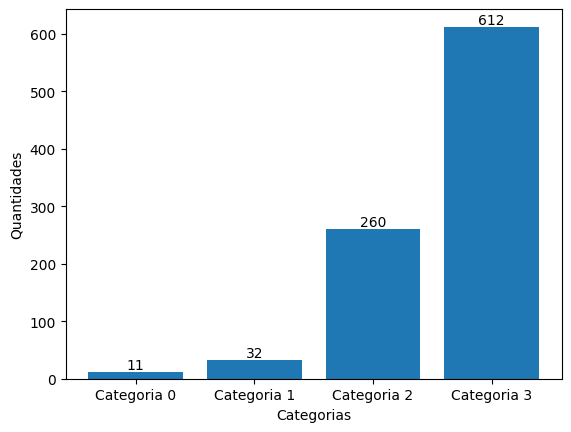

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado dfs e uma coluna chamada 'Categoria'

# Calculando as quantidades de cada categoria
quantidades = [
    (dfs['Categoria'] == 0).sum(),
    (dfs['Categoria'] == 1).sum(),
    (dfs['Categoria'] == 2).sum(),
    (dfs['Categoria'] == 3).sum()
]

# Definindo os rótulos das categorias
categorias = ['Categoria 0', 'Categoria 1', 'Categoria 2', 'Categoria 3']

# Criando o gráfico de colunas
plt.bar(categorias, quantidades)

# Adicionando rótulos aos eixos
plt.xlabel('Categorias')
plt.ylabel('Quantidades')

# Adicionando os valores acima das colunas
for i, v in enumerate(quantidades):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

### 3.5 - Separação Teste e Treino com holdout de acordo do Feature Selection

In [354]:

teste_size = 0.30 # tamanho do conjunto de teste
seede = 42 # semente aleatória

# Separação em conjuntos de treino e teste
array = dfs.values
W = array[:,0:5]
z = array[:,5]
W_treino, W_teste, z_treino, z_teste = train_test_split(W, z,
    test_size=test_size, shuffle=True, random_state=seede, stratify=z) # holdout com estratificação
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seede) # validação cruzada com estratificação

### 3.6 - Modelagem e Inferência

Criação e avaliação de modelos

LR: 0.9109 (0.021021)
KNN: 0.8812 (0.034375)
CART: 0.9844 (0.017116)
NB: 0.3234 (0.048939)
SVM: 0.6734 (0.008414)
Bagging: 0.9891 (0.014063)
RF: 0.9891 (0.014063)
ET: 0.9688 (0.029646)
Ada: 0.9859 (0.008414)
GB: 0.9844 (0.012103)
XG: 0.9844 (0.013975)
LGM: 0.9844 (0.012103)
Voting: 0.9172 (0.017187)


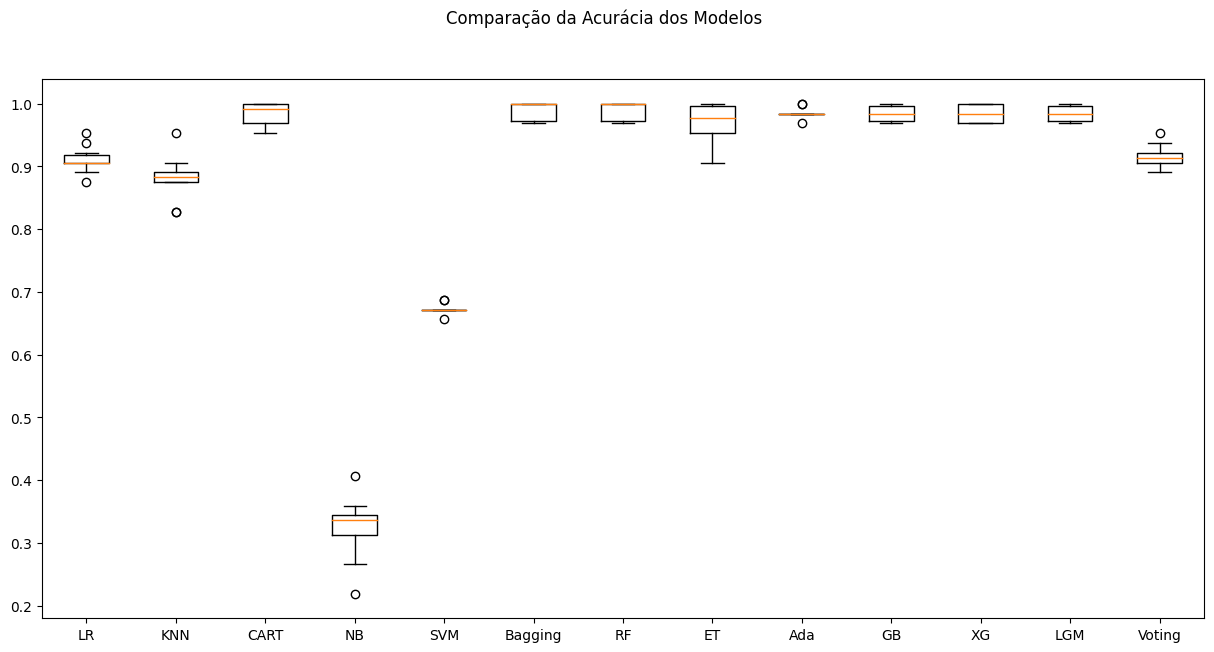

In [355]:
np.random.seed(42) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 5

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('XG', XGBClassifier(n_estimators=num_trees)))
models.append(('LGM', LGBMClassifier(n_estimators=num_trees)))


models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []


# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, W_treino, z_treino, cv=kfold, scoring=scoring)
    cv_results_sorted = np.sort(cv_results)
    results.append(cv_results_sorted)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: %.4f (%f)" % (name, abs(cv_results_sorted.mean()), cv_results_sorted.std()) #"%s: %f (%f)"
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,7))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.7 - Melhor **modelagem** selecionada

In [356]:
# Calcula a média da acurácia para cada modelo
mean_accuracies = [abs(result.mean()) for result in results]

# Encontra o índice do modelo com maior acurácia
best_model_index = np.argmax(mean_accuracies)

# Obtém o nome do modelo com maior acurácia
best_model_name = names[best_model_index]

# Imprime o nome e a acurácia do melhor modelo
print("Melhor modelo: %s, Acurácia: %.4f" % (best_model_name, mean_accuracies[best_model_index]))

Melhor modelo: Bagging, Acurácia: 0.9891


### 3.8 - Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.9109 (0.021)
KNN-orig: 0.8812 (0.034)
CART-orig: 0.9844 (0.017)
NB-orig: 0.3234 (0.049)
SVM-orig: 0.6734 (0.008)
Bag-orig: 0.9891 (0.014)
RF-orig: 0.9891 (0.014)
ET-orig: 0.9688 (0.030)
Ada-orig: 0.9859 (0.008)
GB-orig: 0.9844 (0.012)
XG-orig: 0.9844 (0.014)
LGM-orig: 0.9844 (0.012)
Vot-orig: 0.9172 (0.017)
LR-padr: 0.7750 (0.035)
KNN-padr: 0.8750 (0.043)
CART-padr: 0.9859 (0.015)
NB-padr: 0.3812 (0.041)
SVM-padr: 0.7797 (0.037)
Bag-padr: 0.9922 (0.013)
RF-padr: 0.9891 (0.014)
ET-padr: 0.9578 (0.031)
Ada-padr: 0.9859 (0.008)
GB-padr: 0.9844 (0.012)
XG-padr: 0.9844 (0.014)
LGM-padr: 0.9859 (0.011)
Vot-padr: 0.8203 (0.031)
LR-norm: 0.6719 (0.007)
KNN-norm: 0.8609 (0.053)
CART-norm: 0.9859 (0.016)
NB-norm: 0.3812 (0.041)
SVM-norm: 0.6750 (0.009)
Bag-norm: 0.9922 (0.013)
RF-norm: 0.9906 (0.013)
ET-norm: 0.9578 (0.035)
Ada-norm: 0.9859 (0.008)
GB-norm: 0.9844 (0.012)
XG-norm: 0.9844 (0.014)
LGM-norm: 0.9859 (0.013)
Vot-norm: 0.6797 (0.010)


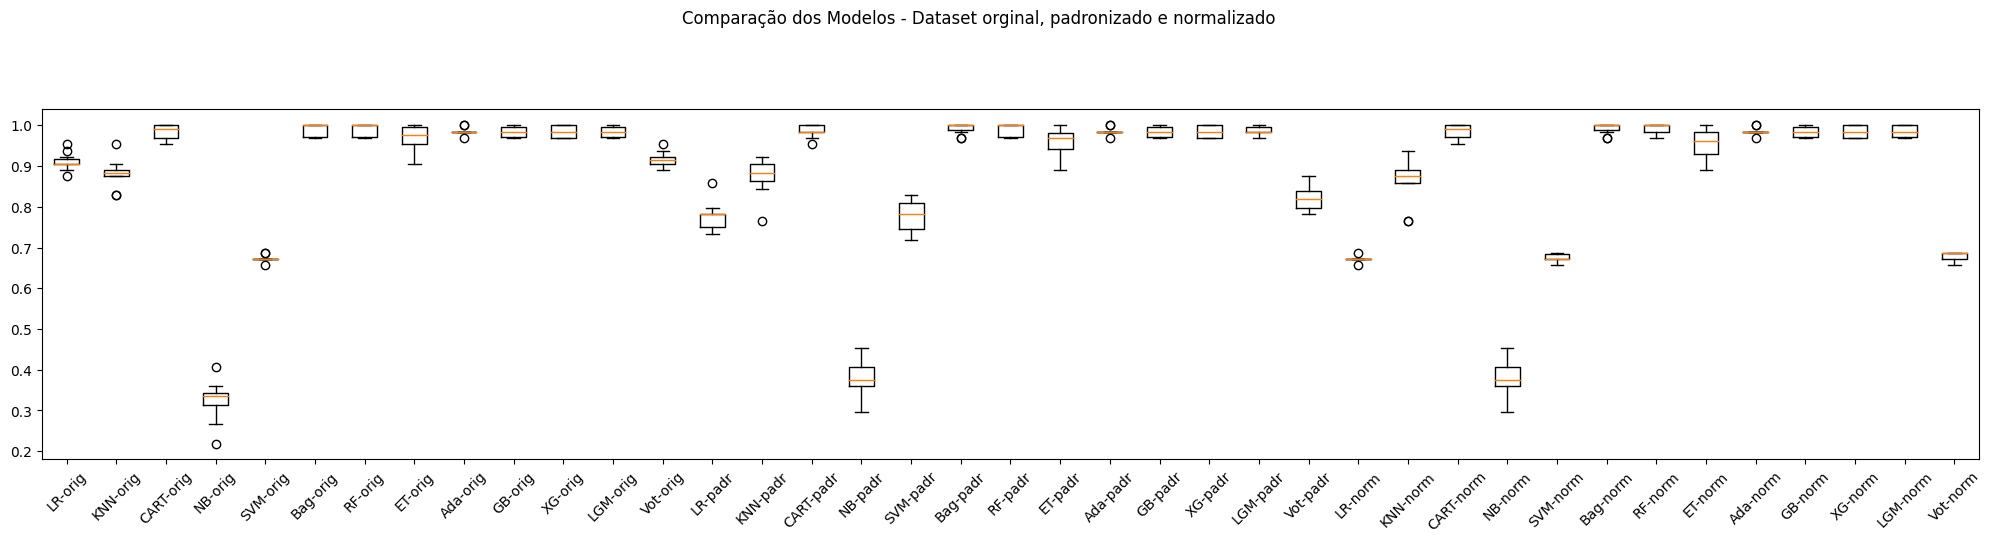

In [357]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
xg = ('XG', XGBClassifier(n_estimators=num_trees))
lightGBM = ('LGM', LGBMClassifier(n_estimators=num_trees))

voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('XG-orig', Pipeline([xg])))
pipelines.append(('LGM-orig', Pipeline([lightGBM])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('XG-padr', Pipeline([standard_scaler, xg])))
pipelines.append(('LGM-padr', Pipeline([standard_scaler,lightGBM])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('XG-norm', Pipeline([min_max_scaler, xg])))
pipelines.append(('LGM-norm', Pipeline([min_max_scaler,lightGBM])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, W_treino, z_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,10))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(211)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45)
plt.show()

### 3.9 - Melhor modelo de ML

In [358]:
# Listas para armazenar as acurácias médias para cada conjunto de dados
mean_accuracies_original = []
mean_accuracies_padronizado = []
mean_accuracies_normalizado = []

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, W_treino, z_treino, cv=kfold, scoring=scoring)
    mean_accuracy = cv_results.mean()

    # Verifica o conjunto de dados e armazena a acurácia média correspondente
    if "-orig" in name:
        mean_accuracies_original.append((name, mean_accuracy))
    elif "-padr" in name:
        mean_accuracies_padronizado.append((name, mean_accuracy))
    elif "-norm" in name:
        mean_accuracies_normalizado.append((name, mean_accuracy))

# Encontra o melhor modelo em cada conjunto de dados
best_model_original, best_accuracy_original = max(mean_accuracies_original, key=lambda x: x[1])
best_model_padronizado, best_accuracy_padronizado = max(mean_accuracies_padronizado, key=lambda x: x[1])
best_model_normalizado, best_accuracy_normalizado = max(mean_accuracies_normalizado, key=lambda x: x[1])

# Imprime a indicação do melhor modelo em cada conjunto de dados

print("Melhor modelo (Original): %s, Acurácia: %.4f" % (best_model_original, best_accuracy_original))
print("Melhor modelo (Padronizado): %s, Acurácia: %.4f" % (best_model_padronizado, best_accuracy_padronizado))
print("Melhor modelo (Normalizado): %s, Acurácia: %.4f" % (best_model_normalizado, best_accuracy_normalizado))

Melhor modelo (Original): Bag-orig, Acurácia: 0.9891
Melhor modelo (Padronizado): RF-padr, Acurácia: 0.9906
Melhor modelo (Normalizado): CART-norm, Acurácia: 0.9891


### 3.10 - Otimização dos hiperparâmetros

In [359]:
# Tuning do KNN

np.random.seed(42) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
xg = ('XG', XGBClassifier(n_estimators=num_trees))
lightGBM = ('LGM', LGBMClassifier(n_estimators=num_trees))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Dataset original
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('XG-orig', Pipeline([xg])))
pipelines.append(('LGM-orig', Pipeline([lightGBM])))

# Dataset Padronizado
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('XG-padr', Pipeline([standard_scaler, xg])))
pipelines.append(('LGM-padr', Pipeline([standard_scaler,lightGBM])))

# Dataset Normalizado
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('XG-norm', Pipeline([min_max_scaler, xg])))
pipelines.append(('LGM-norm', Pipeline([min_max_scaler,lightGBM])))

param_grid = {}

LogisticRegression()

param_grid['CART'] = {'CART__max_depth': [None, 5, 10]}
param_grid['Bag'] = {'Bag__n_estimators': [50, 100, 200]}
param_grid['RF'] = {'RF__n_estimators': [50, 100, 200], 'RF__max_depth': [None, 5, 10]}
param_grid['ET'] = {'ET__n_estimators': [50, 100, 200], 'ET__max_depth': [None, 5, 10]}
param_grid['Ada'] = {'Ada__n_estimators': [50, 100, 200]}
param_grid['GB'] = {'GB__n_estimators': [50, 100, 200], 'GB__max_depth': [None, 5, 10]}
param_grid['XG'] = {'XG__n_estimators': [50, 100, 200]}
param_grid['LGM'] = {'LGM__n_estimators': [50, 100, 200]}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    class_name = model.steps[-1][0]  # Obtém o nome do classificador do pipeline
    if class_name in param_grid:
        grid = GridSearchCV(estimator=model, param_grid=param_grid[class_name], scoring=scoring, cv=kfold)
        grid.fit(W_treino, z_treino)
        # imprime a melhor configuração
        print("Sem tratamento de missings: %s - Melhor: %.4f usando %s" % (name, grid.best_score_, grid.best_params_))
    else:
        print("Sem tratamento de missings: %s - Nenhum parâmetro específico definido" % name)

Sem tratamento de missings: CART-orig - Melhor: 0.9891 usando {'CART__max_depth': 5}
Sem tratamento de missings: Bag-orig - Melhor: 0.9906 usando {'Bag__n_estimators': 200}
Sem tratamento de missings: RF-orig - Melhor: 0.9906 usando {'RF__max_depth': None, 'RF__n_estimators': 200}
Sem tratamento de missings: ET-orig - Melhor: 0.9672 usando {'ET__max_depth': None, 'ET__n_estimators': 200}
Sem tratamento de missings: Ada-orig - Melhor: 0.9859 usando {'Ada__n_estimators': 50}
Sem tratamento de missings: GB-orig - Melhor: 0.9859 usando {'GB__max_depth': None, 'GB__n_estimators': 50}
Sem tratamento de missings: XG-orig - Melhor: 0.9844 usando {'XG__n_estimators': 100}
Sem tratamento de missings: LGM-orig - Melhor: 0.9875 usando {'LGM__n_estimators': 50}
Sem tratamento de missings: CART-padr - Melhor: 0.9906 usando {'CART__max_depth': 5}
Sem tratamento de missings: Bag-padr - Melhor: 0.9891 usando {'Bag__n_estimators': 100}
Sem tratamento de missings: RF-padr - Melhor: 0.9906 usando {'RF__ma

### 3.11 - Salvamento do melhor modelo

In [360]:
lightGBM = LGBMClassifier(random_state=7)

lightGBM.fit(X_train, y_train)
accuracy_score(y_train, lightGBM.predict(X_train))

1.0

In [361]:
joblib.dump(lightGBM, 'modelo_vencedor_regressor.pkl', compress=1)

['modelo_vencedor_regressor.pkl']

In [362]:
lightGBM.feature_importances_

array([774, 549, 103, 264, 818, 115, 145, 221, 176, 191, 155, 561, 167,
       208, 138, 868, 156,  97, 132, 299], dtype=int32)

### 3.12 - Finalização do Modelo

#### 3.12.1 - Avaliação do modelo

In [363]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(W_treino) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(W_treino) # aplicação da padronização no conjunto de treino
model = LGBMClassifier(n_estimators=num_trees)
model.fit(rescaledX, z_treino)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(W_teste) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(z_teste, predictions))

0.9745454545454545


#### 3.12.2 - Preparação do modelo

In [364]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LGBMClassifier()

In [365]:
# Importe o módulo os para interagir com o sistema operacional
import os

# Diretório local onde o modelo foi salvo
modelo_path = 'modelo_vencedor_regressor.pkl'

# Diretório no repositório GitHub onde você deseja salvar o modelo
diretorio_github = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/tree/main/PUC%20SPRINT%20%20Machine%20Learning%20%26%20Analytics'
# Renomeie o arquivo para um nome mais descritivo, se desejar
nome_arquivo_github = 'modelo_vencedor_regressor.pkl'

# Construa o caminho completo do arquivo no diretório GitHub
caminho_github = os.path.join(diretorio_github, nome_arquivo_github)

# Faça o commit e push do arquivo para o repositório GitHub
os.system(f'git mv {modelo_path} {caminho_github}')
os.system(f'git commit -m "Adicionar modelo vencedor"')
os.system('git push origin master')  # ou o nome do branch que você está usando


32768

### 3.13 Simulando a aplicação do modelo em dados não vistos

Aplicação do modelo nas 30% ações selecionados do IBOV

In [366]:

dw = fundamentus.get_resultado().loc[acoes_aleatorias]

dw

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ASAI3,12.54,15.71,4.25,0.291,0.0069,0.433,-5.75,4.25,-0.74,6.45,5.04,0.0685,0.0185,0.1740,0.2709,0.81,3.468630e+08,3.980000e+09,3.24,0.3367
FESA4,48.10,4.51,1.34,1.363,0.0777,1.029,3.07,3.94,4.89,3.30,2.82,0.3459,0.3021,0.3615,0.2969,4.17,1.086040e+07,3.171180e+09,0.11,0.2640
BLAU3,19.61,9.96,1.91,2.602,0.0391,1.404,2.73,8.84,3.66,8.08,7.62,0.2943,0.2591,0.2279,0.1922,4.71,1.108680e+07,1.838340e+09,0.17,0.1386
MEGA3,10.50,7464.24,1.29,2.630,0.0000,0.389,-18.90,11.67,-0.71,25.12,14.43,0.2253,0.0016,0.0363,0.0002,0.88,1.104920e+07,5.066810e+09,1.71,0.0000
YDUQ3,21.00,446.48,2.09,1.385,0.0000,0.678,6.28,9.85,-1.61,16.22,7.76,0.1406,0.0038,0.0805,0.0047,1.74,9.814420e+07,3.100240e+09,1.72,0.0783
BRAP4,22.76,2.50,1.20,0.000,0.1287,1.116,44.49,-440.00,44.71,-401.50,-401.50,0.0000,0.0000,-0.0028,0.4804,1.35,7.507890e+07,7.434840e+09,0.00,0.0000
AMBP3,22.16,-30.59,2.08,0.601,0.0061,0.242,0.84,3.22,-0.64,8.34,5.72,0.1864,-0.0123,0.1099,-0.0678,2.85,2.461280e+07,1.205910e+09,5.82,1.2520
LOGG3,22.20,8.04,0.63,9.316,0.0413,0.378,-274.10,12.03,-1.17,20.39,20.15,0.7744,1.2218,0.0326,0.0781,0.98,8.109980e+06,3.612920e+09,0.48,0.1906
RENT3,70.33,40.32,3.58,3.406,0.0190,1.124,-209.05,14.42,-2.22,20.20,13.00,0.2362,0.0843,0.0918,0.0887,0.97,5.268520e+08,2.084380e+10,1.72,0.2109


#### 3.13.1 - Aplicação o modelo

In [367]:

array_dw = dw.values
X_entrada = array_dw[:,0:20].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.10627668  0.03469612 -0.04765813 ... -0.06095584 -0.04405799
   0.02457993]
 [-0.01027828  0.03088657 -0.04774606 ... -0.10058096 -0.04721542
   0.0002944 ]
 [-0.08719038  0.03274032 -0.04772884 ... -0.16587851 -0.04715489
  -0.04159562]
 ...
 [-0.12557894  0.03229474 -0.0477373  ... -0.10254503 -0.0465799
  -0.07045764]
 [-0.12082762  0.03289679 -0.04776328 ... -0.1598614  -0.04691279
  -0.05412254]
 [-0.12417514  0.03373693 -0.04776056 ... -0.19277815 -0.04658999
  -0.06778523]]


#### 3.13.2 - Predição do modelo

In [368]:
# Predição de classes dos dados de entrada
Categoria = model.predict(rescaledEntradaX)
print(Categoria)

[3. 1. 3. 3. 3. 3. 2. 3. 3. 3. 2. 3. 2. 3. 0. 3. 3. 3. 3. 1. 2. 3. 3. 3.
 2. 3. 3. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2. 3. 1. 3. 3. 3. 2.
 3. 2. 3. 3. 3.]


#### 3.13.3 - Resposta da classe com aplicação o modelo

In [369]:
dw['Categoria'] = Categoria
dw['Categoria'] = Categoria.astype('float64')
dw

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Categoria
papel,,,,,,,,,,,,,,,,,,,,,
ASAI3,12.54,15.71,4.25,0.291,0.0069,0.433,-5.75,4.25,-0.74,6.45,...,0.0685,0.0185,0.1740,0.2709,0.81,3.468630e+08,3.980000e+09,3.24,0.3367,3.0
FESA4,48.10,4.51,1.34,1.363,0.0777,1.029,3.07,3.94,4.89,3.30,...,0.3459,0.3021,0.3615,0.2969,4.17,1.086040e+07,3.171180e+09,0.11,0.2640,1.0
BLAU3,19.61,9.96,1.91,2.602,0.0391,1.404,2.73,8.84,3.66,8.08,...,0.2943,0.2591,0.2279,0.1922,4.71,1.108680e+07,1.838340e+09,0.17,0.1386,3.0
MEGA3,10.50,7464.24,1.29,2.630,0.0000,0.389,-18.90,11.67,-0.71,25.12,...,0.2253,0.0016,0.0363,0.0002,0.88,1.104920e+07,5.066810e+09,1.71,0.0000,3.0
YDUQ3,21.00,446.48,2.09,1.385,0.0000,0.678,6.28,9.85,-1.61,16.22,...,0.1406,0.0038,0.0805,0.0047,1.74,9.814420e+07,3.100240e+09,1.72,0.0783,3.0
BRAP4,22.76,2.50,1.20,0.000,0.1287,1.116,44.49,-440.00,44.71,-401.50,...,0.0000,0.0000,-0.0028,0.4804,1.35,7.507890e+07,7.434840e+09,0.00,0.0000,3.0
AMBP3,22.16,-30.59,2.08,0.601,0.0061,0.242,0.84,3.22,-0.64,8.34,...,0.1864,-0.0123,0.1099,-0.0678,2.85,2.461280e+07,1.205910e+09,5.82,1.2520,2.0
LOGG3,22.20,8.04,0.63,9.316,0.0413,0.378,-274.10,12.03,-1.17,20.39,...,0.7744,1.2218,0.0326,0.0781,0.98,8.109980e+06,3.612920e+09,0.48,0.1906,3.0
RENT3,70.33,40.32,3.58,3.406,0.0190,1.124,-209.05,14.42,-2.22,20.20,...,0.2362,0.0843,0.0918,0.0887,0.97,5.268520e+08,2.084380e+10,1.72,0.2109,3.0


### 3.14 - Gráfico de composição da classe

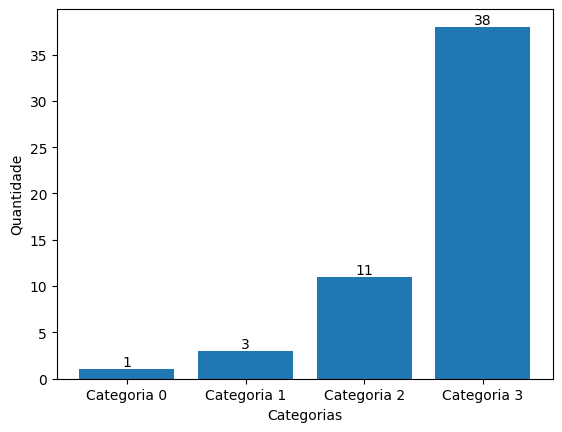

In [370]:
# Calculando as quantidades de cada categoria
quantidades = [
    (dw['Categoria'] == 0).sum(),
    (dw['Categoria'] == 1).sum(),
    (dw['Categoria'] == 2).sum(),
    (dw['Categoria'] == 3).sum()
]

# Definindo os rótulos das categorias
categorias = ['Categoria 0', 'Categoria 1', 'Categoria 2', 'Categoria 3']

# Criando o gráfico de colunas
plt.bar(categorias, quantidades)

# Adicionando rótulos aos eixos
plt.xlabel('Categorias')
plt.ylabel('Quantidade')

# Adicionando os valores acima das colunas
for i, v in enumerate(quantidades):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

### 3.15 - Conclusão

Das 987 ações que atuam no mercado e de acordo com subjetiva definição para investimento somente 12 ações são ações para investir através do modelo de classificação LightGBM (Light Gradient Boosting Machine), um poderoso algoritmo de aprendizado de máquina baseado em boosting

In [371]:
dt = fundamentus.get_resultado()
array_dt = dt.values
X_entrada = array_dt[:,0:20].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
Categoria_novo = model.predict(rescaledEntradaX)
dt['Categoria'] = Categoria_novo
dt['Categoria'] = Categoria_novo.astype('float64')
dt_filtrado = dt[dt['Categoria'] == 0]
dt_filtrado


Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Categoria
papel,,,,,,,,,,,,,,,,,,,,,
AFLT3,9.30,14.96,2.16,7.324,0.0639,1.904,10.08,14.62,15.20,14.15,...,0.5011,0.4896,0.1404,0.1446,4.34,3989.14,2.711650e+08,0.00,0.3147,0.0
ALUP3,9.59,12.21,1.22,2.465,0.0521,0.306,2.93,3.26,-0.71,6.58,...,0.7556,0.3689,0.1051,0.1000,2.15,191458.00,7.183090e+09,1.64,0.0651,0.0
ALUP4,9.57,12.18,1.22,2.460,0.0522,0.306,2.93,3.26,-0.71,6.58,...,0.7556,0.3689,0.1051,0.1000,2.15,281403.00,7.183090e+09,1.64,0.0651,0.0
ATOM3,2.59,15.83,2.46,2.060,0.1237,1.627,1.89,25.28,2.52,14.56,...,0.0815,0.1301,0.2178,0.1551,8.27,69046.10,2.510200e+07,0.00,0.3647,0.0
CBAV3,4.72,5.32,0.54,0.333,0.0933,0.214,1.02,4.08,-1.01,7.51,...,0.0816,0.0734,0.0635,0.1021,2.25,36133700.00,5.177030e+09,0.71,-0.0531,0.0
GRND3,7.57,12.07,2.02,2.716,0.1905,1.372,3.61,21.99,3.70,16.77,...,0.1235,0.2249,0.1010,0.1669,2.23,12316100.00,3.388940e+09,0.07,0.0412,0.0
JHSF3,5.29,6.71,0.72,2.002,0.0635,0.343,1.48,5.20,-1.87,8.38,...,0.3848,0.3080,0.0720,0.1074,3.78,16346000.00,4.988590e+09,0.62,0.4329,0.0
KLBN3,4.24,4.89,2.23,1.165,0.0716,0.482,3.55,3.53,-1.01,6.63,...,0.3304,0.2596,0.1706,0.4567,2.07,1776430.00,1.066840e+10,2.63,0.2077,0.0
KLBN4,4.22,4.87,2.22,1.160,0.0719,0.480,3.54,3.51,-1.00,6.62,...,0.3304,0.2596,0.1706,0.4567,2.07,9444310.00,1.066840e+10,2.63,0.2077,0.0


## **4. Deep Learnig**

### 4.1 Preparar e Carregar Dados

Com bases nas melhores ações para investir, selecionamos um determinado período (série temporal) para aplicação das redes neurais profundas

In [372]:
tickers = (dt_filtrado.index)
tickers = [acao + '.SA' for acao in tickers]

Ações Selecionadas

In [373]:
tickers

['AFLT3.SA',
 'ALUP3.SA',
 'ALUP4.SA',
 'ATOM3.SA',
 'CBAV3.SA',
 'GRND3.SA',
 'JHSF3.SA',
 'KLBN3.SA',
 'KLBN4.SA',
 'LAVV3.SA',
 'MELK3.SA',
 'MTRE3.SA']

### 4.2 Cargas de Dados

In [430]:
df = yf.download(tickers, start = '2013-01-01', end='2023-06-30')
df=df[('Close')]

[*********************100%***********************]  12 of 12 completed


In [375]:
#remoção de linhas que contenham valores ausentes (NaN)
df = df.dropna()
df

,AFLT3.SA,ALUP3.SA,ALUP4.SA,ATOM3.SA,CBAV3.SA,GRND3.SA,JHSF3.SA,KLBN3.SA,KLBN4.SA,LAVV3.SA,MELK3.SA,MTRE3.SA
Date,,,,,,,,,,,,
2021-07-16,10.28,8.269230,8.442307,5.987471,11.90,11.08,7.78,6.08,4.97,7.77,5.98,12.11
2021-07-19,10.37,8.230769,8.240384,5.662638,11.34,11.05,7.62,6.06,4.90,7.68,6.07,11.89
2021-07-20,10.37,8.201923,8.278846,5.566066,11.49,10.85,7.73,6.08,4.97,7.80,6.06,11.84
2021-07-21,10.13,8.086538,8.288461,5.592404,11.58,10.91,7.56,6.04,4.92,7.67,6.03,11.55
2021-07-22,9.80,8.086538,8.259615,5.566066,11.25,11.01,7.72,6.03,4.91,7.82,5.97,11.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,9.55,10.240000,10.200000,2.730000,5.21,7.55,4.97,4.56,4.53,6.69,4.14,6.69
2023-06-26,9.04,9.910000,10.000000,2.690000,5.25,7.52,5.00,4.46,4.45,6.75,4.22,6.71
2023-06-27,9.06,9.720000,9.750000,2.590000,5.19,7.35,4.88,4.42,4.42,6.57,4.04,6.50


### 4.3 Gráfico históricos das ações selecionadas

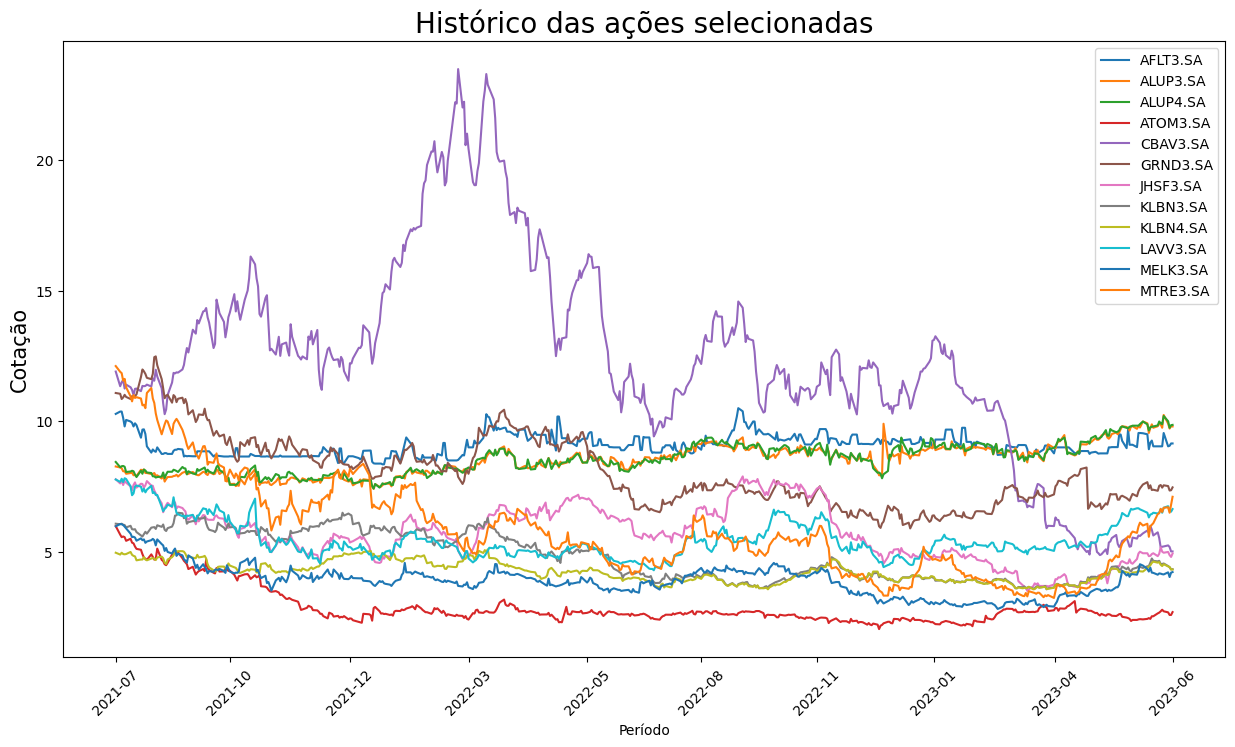

In [376]:
plt.figure(figsize=(15,8))
# Plot das colunas com labels para a legenda dos tickers
for ticker in tickers:
    plt.plot(df.index, df[ticker], label=ticker)
num_ticks = 9
interval = int(df.shape[0] / num_ticks)
xticks_indices = range(0, df.shape[0], interval)
xticks_dates = df.index[xticks_indices]
plt.xticks(xticks_dates, xticks_dates.strftime('%Y-%m'), rotation=45)
plt.xlabel('Período', fontsize=10)
plt.ylabel('Cotação', fontsize=15)
# Acrescenta a legenda ao gráfico
plt.legend()
plt.title("Histórico das ações selecionadas", fontsize=20)
plt.show()

### 4.4 - Separação em conjunto de treino e conjunto de teste

In [377]:
days_time_step = 30

In [378]:
import numpy as np
training_size = int(len(df) * 0.80)
test_size = len(df) - training_size
train_data, input_data = np.array(df[0:training_size]), np.array(df[training_size - days_time_step:])
test_data = np.array(df[training_size:])

train_data.shape, test_data.shape

((389, 12), (98, 12))

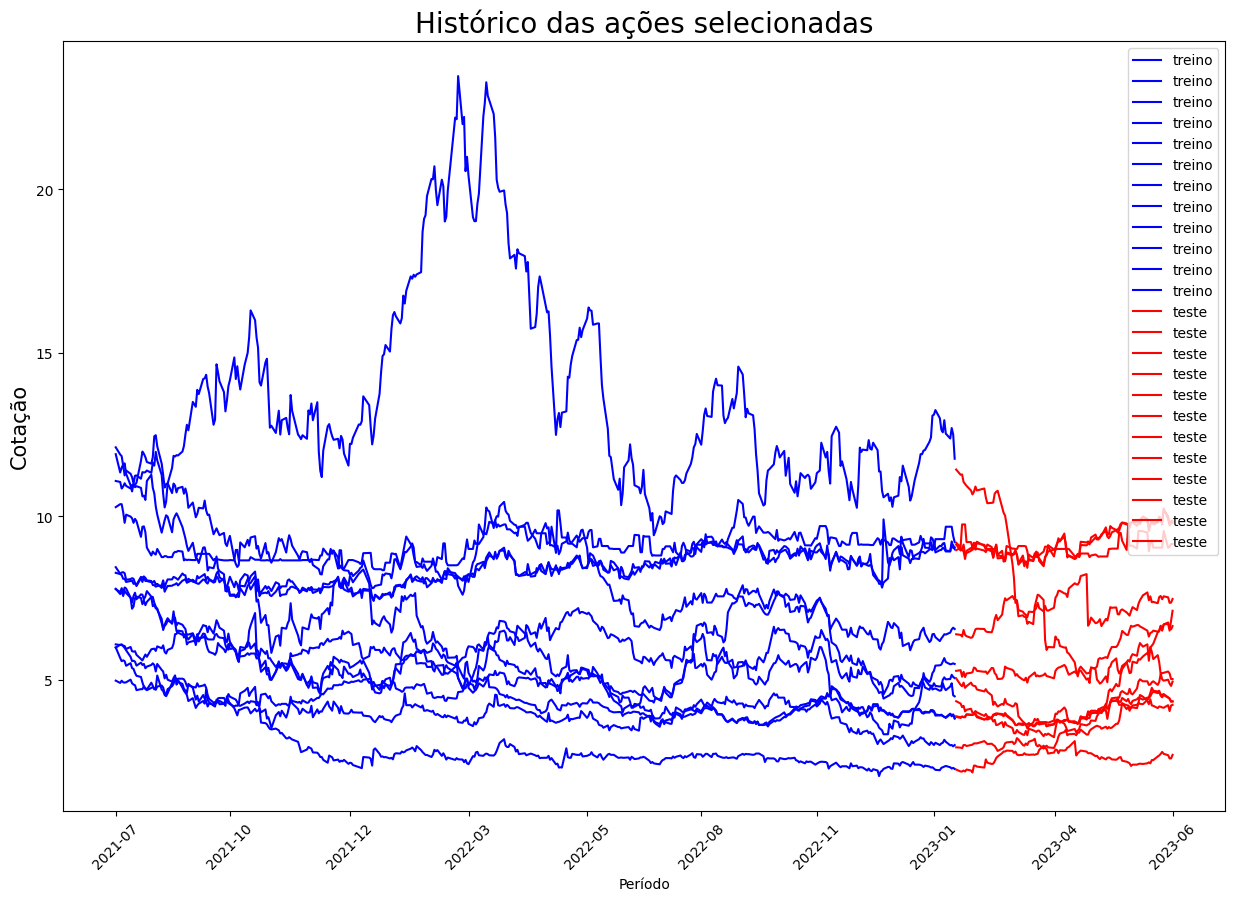

In [379]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
# Plot das colunas com labels para a legenda dos tickers
#for ticker in tickers:
#    plt.plot(df.index, df[ticker], label=ticker)
num_ticks = 9
interval = int(df.shape[0] / num_ticks)
xticks_indices = range(0, df.shape[0], interval)
xticks_dates = df.index[xticks_indices]
plt.xticks(xticks_dates, xticks_dates.strftime('%Y-%m'), rotation=45)

plt.plot(df.iloc[0:training_size], color='blue', label='treino')
plt.plot(df.iloc[training_size:], color='red', label='teste')

plt.xlabel('Período', fontsize=10)
plt.ylabel('Cotação', fontsize=15)
# Acrescenta a legenda ao gráfico
plt.legend()
plt.title("Histórico das ações selecionadas", fontsize=20)
plt.show()


### 4.5 - Normalização dos dados e Pré-processamento do treino e teste

In [380]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data_norm = scaler.fit_transform(np.array(train_data).reshape(-1,12))
test_data_norm = scaler.transform(np.array(input_data).reshape(-1,12))
val_data_norm = scaler.transform(np.array(test_data).reshape(-1,12))

val_data_norm.shape

(98, 12)

In [420]:

# Separação dos dados para treinamento, validação e teste
def prepare_data(data, days_time_step):
    X, y = [], []
    for i in range(days_time_step, len(data)):
        X.append(data[i - days_time_step:i])
        y.append(data[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

X_train, y_train = prepare_data(train_data_norm, days_time_step)
X_val, y_val = prepare_data(val_data_norm, days_time_step)
X_test, y_test = prepare_data(test_data_norm, days_time_step)

X_test.shape, y_test.shape

((98, 30, 12), (98, 12))

In [382]:
import tensorflow as tf

tf.__version__

'2.12.0'


### 4.6 - Modelagem e inferência

In [412]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM , Activation, SimpleRNN
from keras.optimizers import SGD
from keras.optimizers import Adam
#tf.keras.backend.clear_session()

# Modelos LSTM, LSTM2, RNN, MLP, MLP_Relu e FF
models = [
    {
        'name': 'LSTM', # carrega um modelo LTMS com 1 camadas
        'model': Sequential([
            LSTM(100, return_sequences=False, input_shape=(days_time_step, 12)),#cria uma camada densa com com 100 neuronios e 12 entradas
            Dense(12),#camada densa com 12 neuronios (que recebe as saídas da camada anterior)
            Dropout(0.3)
        ])
    },
    {
        'name': 'LSTM2',# carrega um modelo LTMS com 2 camadas
        'model': Sequential([
            LSTM(100, return_sequences=True, input_shape=(days_time_step, 12)), #cria uma camada densa com com 100 neuronios e 12 entradas
            Dropout(0.3),
            LSTM(100, return_sequences=False),#cria uma camada densa com com 100 neuronios (que recebe as saídas da camada anterior)
            Dropout(0.3),
            Dense(12) #camada densa com 12 neuronios (que recebe as saídas da camada anterior)
        ])
    },
    {
        'name': 'RNN', # carrega um modelo rede neural recorrente
        'model': Sequential([
            SimpleRNN(100, return_sequences=False, input_shape=(days_time_step, 12)),
            Dense(12) #camada densa com 12 neuronios (que recebe as saídas da camada anterior)
        ])
    },
    {
        'name': 'MLP',# carrega um modelo feed-forward
        'model': Sequential([
            Dense(100, input_shape=(days_time_step * 12,)),  #cria uma camada densa com com 100 neuronios e 12 entradas
            Activation('tanh'),#usando função de ativação tangente hiperbólica
            Dense(12) #camada densa com 12 neuronios (que recebe as saídas da camada anterior)
        ])
    },
    {
        'name': 'MLP_Relu',# carrega um modelo feed-forward com ativação Relu
        'model': Sequential([
            Dense(100, input_shape=(days_time_step * 12,)),  #cria uma camada densa com com 100 neuronios e 12 entradas
            Activation('relu'),
            Dense(12) #camada densa com 12 neuronios (que recebe as saídas da camada anterior)
        ])
    },
    {
        'name': 'FF',
        'model': Sequential([
            Dense(64, input_shape=(days_time_step * 12,)),  #cria uma camada densa com com 64 neuronios e 12 entradas
            Activation('relu'),#usando função de ativação relu
            Dense(32), #camada densa com com 32 neuronios (que recebe as saídas da camada anterior)
            Activation('relu'),#usando função de ativação relu
            Dense(16),#camada densa com com 16 neuronios (que recebe as saídas da camada anterior)
            Activation('relu'),#usando função de ativação relu
            Dense(12) #camada densa com 12 neuronios (que recebe as saídas da camada anterior)
        ])
    }
]







### 4.7 Treinamento dos modelos

In [413]:
# Treinamento dos modelos
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']

    model.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001),
                  loss='mse',
                  metrics=['mae'])

    # Exibir o resumo (summary) do modelo
    print(f"Summary of {model_name}:")
    model.summary()

    print(f"Training {model_name}...")
    if model_name in ['MLP', 'MLP_Relu', 'FF']:
        # Ajuste da dimensão dos dados de treinamento para modelos unidimensionais
        X_train_reshaped = X_train.reshape((X_train.shape[0], days_time_step * 12))
        X_val_reshaped = X_val.reshape((X_val.shape[0], days_time_step * 12))
        history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=30, batch_size=32, verbose=1)
    else:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=1)


Summary of LSTM:
Model: "sequential_285"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_402 (LSTM)             (None, 100)               45200     
                                                                 
 dense_370 (Dense)           (None, 12)                1212      
                                                                 
 dropout_397 (Dropout)       (None, 12)                0         
                                                                 
Total params: 46,412
Trainable params: 46,412
Non-trainable params: 0
_________________________________________________________________
Training LSTM...
Epoch 1/30
12/12 [==============================] - 4s 139ms/step - loss: 0.1157 - mae: 0.2601 - val_loss: 0.0867 - val_mae: 0.2158
Epoch 2/30
12/12 [==============================] - 1s 53ms/step - loss: 0.0679 - mae: 0.1812 - val_loss: 0.0700 - val_mae: 0.2107
Epoch 3/30
12/1

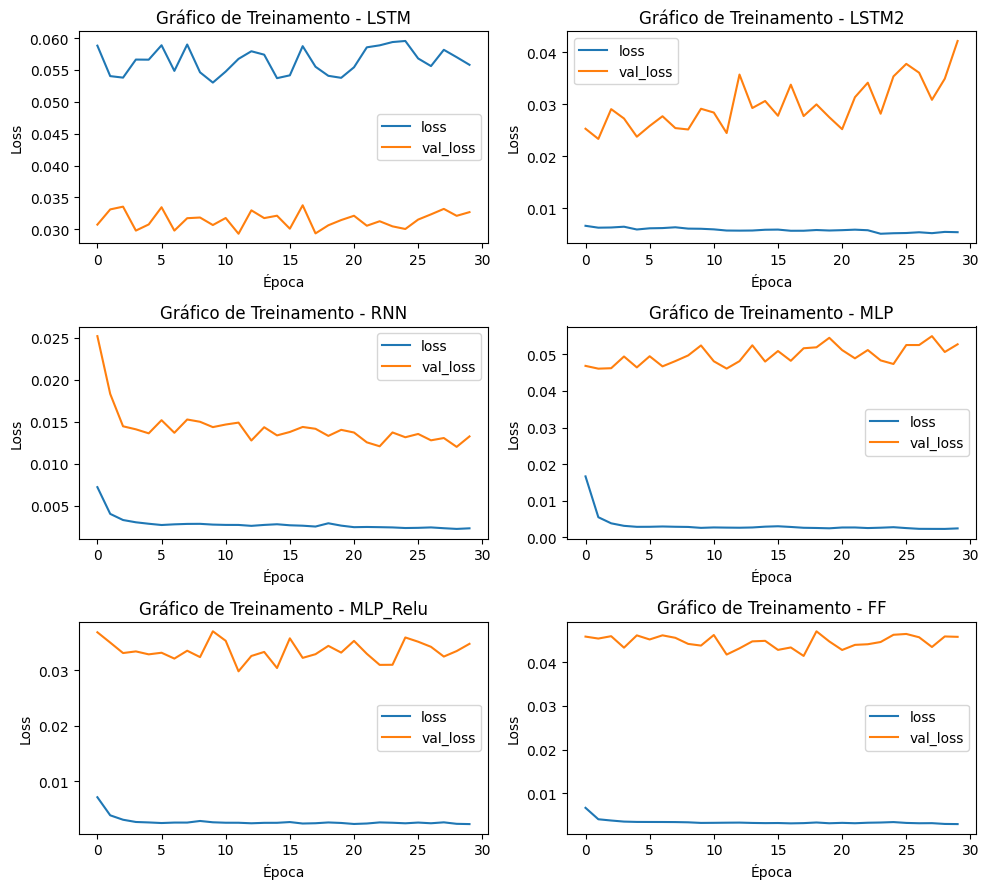

In [418]:
import matplotlib.pyplot as plt

ncols = 2
nrows = (len(models) + 1) // ncols  # Divisão inteira para o número de linhas

# Criação da figura com subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3*nrows))

# Treinamento dos modelos e plotagem do gráfico de treinamento
for idx, model_info in enumerate(models):
    model_name = model_info['name']
    model = model_info['model']

    model.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001),
                  loss='mse',
                  metrics=['mae'])

    # Treinamento do modelo
    if model_name in ['MLP', 'MLP_Relu', 'FF']:
        # Ajuste da dimensão dos dados de treinamento para modelos unidimensionais
        X_train_reshaped = X_train.reshape((X_train.shape[0], days_time_step * 12))
        X_val_reshaped = X_val.reshape((X_val.shape[0], days_time_step * 12))
        history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=30, batch_size=32, verbose=0)
    else:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=0)

    # Plotar o gráfico de treinamento no subplot correspondente ao modelo
    row = idx // ncols
    col = idx % ncols
    axs[row, col].plot(history.history["loss"], label='loss')
    axs[row, col].plot(history.history["val_loss"], label='val_loss')
    axs[row, col].set_xlabel('Época')
    axs[row, col].set_ylabel('Loss')
    axs[row, col].set_title(f"Gráfico de Treinamento - {model_name}")
    axs[row, col].legend()

# Ajustar o espaço entre os subplots e exibir a figura
plt.tight_layout()
plt.show()


### 4.8 Avaliação do desempenho do modelo

In [421]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cálculo do MSE e MAE para cada modelo
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']

    print(f"Calculating MSE and MAE for {model_name}...")

    # Calcular as métricas MSE e MAE para cada modelo
    if model_name in ['MLP', 'MLP_Relu', 'FF']:
        y_pred = model.predict(X_test.reshape((X_test.shape[0], days_time_step * 12)))
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"MSE ({model_name}): {mse:.4f}")
    print(f"MAE ({model_name}): {mae:.4f}")
    print()

Calculating MSE and MAE for LSTM...
4/4 [==============================] - 1s 9ms/step
MSE (LSTM): 0.0263
MAE (LSTM): 0.1255

Calculating MSE and MAE for LSTM2...
4/4 [==============================] - 1s 26ms/step
MSE (LSTM2): 0.0319
MAE (LSTM2): 0.1346

Calculating MSE and MAE for RNN...
4/4 [==============================] - 0s 7ms/step
MSE (RNN): 0.0113
MAE (RNN): 0.0793

Calculating MSE and MAE for MLP...
4/4 [==============================] - 0s 4ms/step
MSE (MLP): 0.0409
MAE (MLP): 0.1511

Calculating MSE and MAE for MLP_Relu...
4/4 [==============================] - 0s 3ms/step
MSE (MLP_Relu): 0.0297
MAE (MLP_Relu): 0.1379

Calculating MSE and MAE for FF...
4/4 [==============================] - 0s 3ms/step
MSE (FF): 0.0357
MAE (FF): 0.1415



In [422]:
# Criação de um dicionário para armazenar as métricas de cada modelo
metrics_dict = {}

# Cálculo do MSE e MAE para cada modelo
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']

    print(f"Calculating MSE and MAE for {model_name}...")

    # Fazer as previsões usando o modelo
    if model_name in ['MLP', 'MLP_Relu', 'FF']:
        y_pred = model.predict(X_test.reshape((X_test.shape[0], days_time_step * 12)))
    else:
        y_pred = model.predict(X_test)

    # Calcular as métricas MSE e MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Armazenar as métricas no dicionário
    metrics_dict[model_name] = {'MSE': mse, 'MAE': mae}

    print(f"MSE ({model_name}): {mse:.4f}")
    print(f"MAE ({model_name}): {mae:.4f}")
    print()

# Encontrar o melhor modelo com base no MSE
best_mse_model = min(metrics_dict, key=lambda x: metrics_dict[x]['MSE'])
best_mse_value = metrics_dict[best_mse_model]['MSE']

# Encontrar o melhor modelo com base no MAE
best_mae_model = min(metrics_dict, key=lambda x: metrics_dict[x]['MAE'])
best_mae_value = metrics_dict[best_mae_model]['MAE']

# Exibir os resultados
print("Results:")
for model_name, metrics in metrics_dict.items():
    print(f"Model: {model_name}, MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}")

print()
print(f"Best Model (MSE): {best_mse_model}, MSE: {best_mse_value:.4f}")
print(f"Best Model (MAE): {best_mae_model}, MAE: {best_mae_value:.4f}")

Calculating MSE and MAE for LSTM...
4/4 [==============================] - 0s 8ms/step
MSE (LSTM): 0.0263
MAE (LSTM): 0.1255

Calculating MSE and MAE for LSTM2...
4/4 [==============================] - 0s 17ms/step
MSE (LSTM2): 0.0319
MAE (LSTM2): 0.1346

Calculating MSE and MAE for RNN...
4/4 [==============================] - 0s 8ms/step
MSE (RNN): 0.0113
MAE (RNN): 0.0793

Calculating MSE and MAE for MLP...
4/4 [==============================] - 0s 5ms/step
MSE (MLP): 0.0409
MAE (MLP): 0.1511

Calculating MSE and MAE for MLP_Relu...
4/4 [==============================] - 0s 3ms/step
MSE (MLP_Relu): 0.0297
MAE (MLP_Relu): 0.1379

Calculating MSE and MAE for FF...
4/4 [==============================] - 0s 3ms/step
MSE (FF): 0.0357
MAE (FF): 0.1415

Results:
Model: LSTM, MSE: 0.0263, MAE: 0.1255
Model: LSTM2, MSE: 0.0319, MAE: 0.1346
Model: RNN, MSE: 0.0113, MAE: 0.0793
Model: MLP, MSE: 0.0409, MAE: 0.1511
Model: MLP_Relu, MSE: 0.0297, MAE: 0.1379
Model: FF, MSE: 0.0357, MAE: 0.1415

B

### 4.9 Avaliação de Resultado

In [423]:
# Encontrar o melhor modelo com base no MAE
best_mae_model = min(metrics_dict, key=lambda x: metrics_dict[x]['MAE'])
best_mae_value = metrics_dict[best_mae_model]['MAE']

# Exibir os resultados
print("Results:")
for model_name, metrics in metrics_dict.items():
    print(f"Model: {model_name}, MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}")

print()
print(f"Best Model (MSE): {best_mae_model}, MSE: {best_mae_value:.4f}")

# Encontrar o modelo RNN na lista de modelos
best_model = None
for model_info in models:
    if model_info['name'] == best_mae_model:
        best_model = model_info['model']
        break

if best_model is None:
    print(f"Modelo {best_mae_model} não encontrado na lista de modelos.")
else:
    # Fazer a predição usando o melhor modelo encontrado
    predict = best_model.predict(X_test)

    # Transformação inversa do normalizador para obter os valores reais
    predict = scaler.inverse_transform(predict)
    real = test_data

print("Shape das previsões:", predict.shape)



Results:
Model: LSTM, MSE: 0.0263, MAE: 0.1255
Model: LSTM2, MSE: 0.0319, MAE: 0.1346
Model: RNN, MSE: 0.0113, MAE: 0.0793
Model: MLP, MSE: 0.0409, MAE: 0.1511
Model: MLP_Relu, MSE: 0.0297, MAE: 0.1379
Model: FF, MSE: 0.0357, MAE: 0.1415

Best Model (MSE): RNN, MSE: 0.0793
4/4 [==============================] - 0s 5ms/step
Shape das previsões: (98, 12)


### 4.10 Projeção dos preços das ações

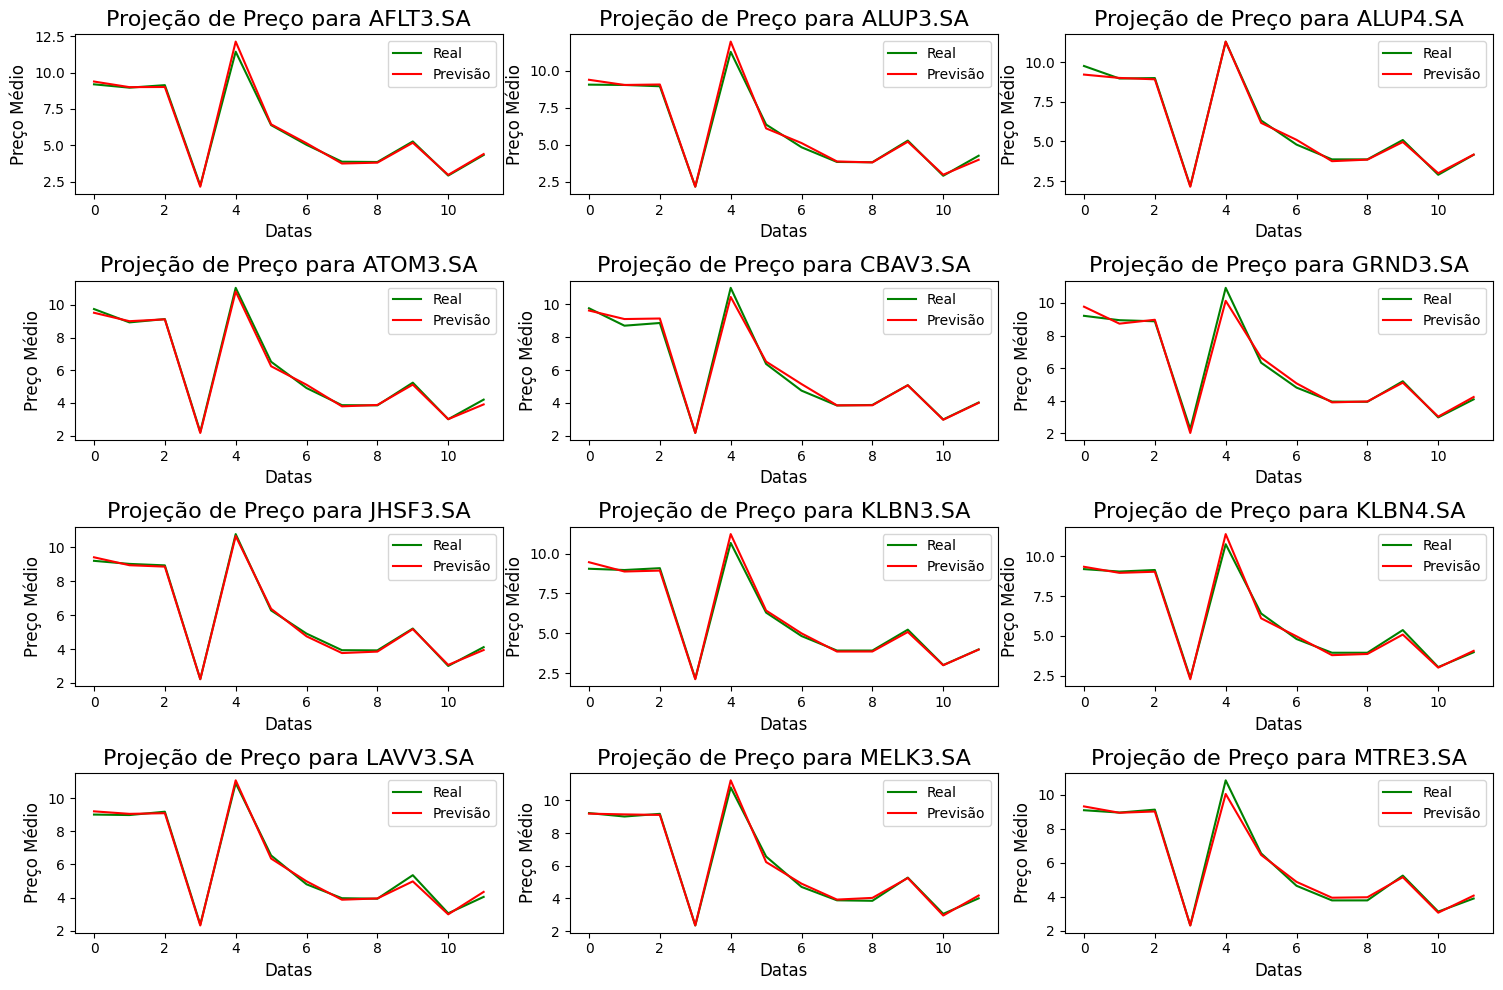

In [424]:
import matplotlib.pyplot as plt

def plot_ticker_prediction(ax, real, predict, ticker):
    ax.plot(real, color='green', label='Real')
    ax.plot(predict, color='red', label='Previsão')
    ax.set_xlabel('Datas', fontsize=12)
    ax.set_ylabel('Preço Médio', fontsize=12)
    ax.set_title(f"Projeção de Preço para {ticker}", fontsize=16)
    ax.legend()

# Dicionário para armazenar as previsões e dados reais para cada ticker
data_by_ticker = {}

# Itera sobre cada ticker para organizar os dados em data_by_ticker
for i, ticker in enumerate(tickers):
    # Assumindo que você tem os dados corretos para cada ticker
    real_data = real[i]  # Dados reais para o ticker atual
    predict_data = predict[i]  # Dados de previsão para o ticker atual

    # Armazena os dados no dicionário data_by_ticker
    data_by_ticker[ticker] = {'real': real_data, 'predict': predict_data}

# Criar gráfico para cada ticker, organizando-os em 3 por linha
num_tickers = len(tickers)
num_plots_per_row = 3
num_rows = (num_tickers + num_plots_per_row - 1) // num_plots_per_row

fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))

for i, ticker in enumerate(tickers):
    real_data = data_by_ticker[ticker]['real']
    predict_data = data_by_ticker[ticker]['predict']

    row = i // num_plots_per_row
    col = i % num_plots_per_row
    axs[row, col].set_title(ticker)
    plot_ticker_prediction(axs[row, col], real_data, predict_data, ticker)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 6ms/step


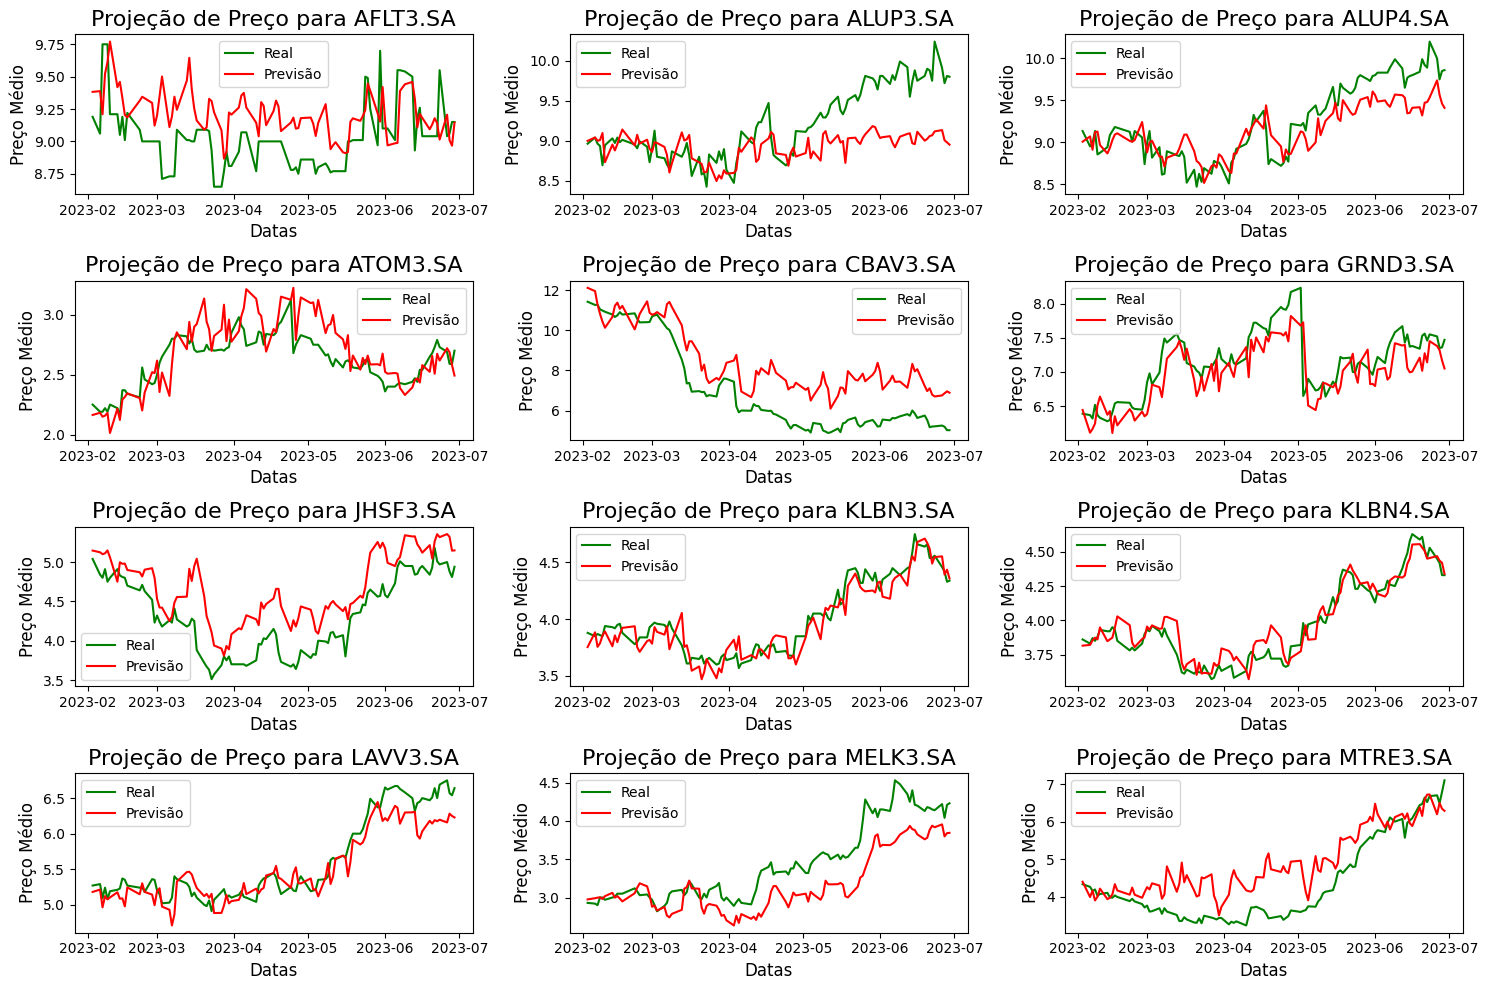

In [425]:
import matplotlib.pyplot as plt

def plot_ticker_prediction(ax, real, predict, ticker):
    ax.plot(real.index, real, color='green', label='Real')
    ax.plot(predict.index, predict, color='red', label='Previsão')
    ax.set_xlabel('Datas', fontsize=12)
    ax.set_ylabel('Preço Médio', fontsize=12)
    ax.set_title(f"Projeção de Preço para {ticker}", fontsize=16)
    ax.legend()

# Encontrar o modelo RNN na lista de modelos
best_model = None
for model_info in models:
    if model_info['name'] == best_mae_model:
        best_model = model_info['model']
        break

if best_model is None:
    print(f"Modelo {best_mae_model} não encontrado na lista de modelos.")
else:
    # Fazer a predição usando o melhor modelo encontrado
    predict = best_model.predict(X_test)

    # Transformação inversa do normalizador para obter os valores reais
    predict = scaler.inverse_transform(predict)
    real = test_data

    # Converter as previsões e dados reais para um DataFrame com as datas corretas
    df_predict = pd.DataFrame(predict, index=df.index[-len(predict):], columns=df.columns)
    df_real = pd.DataFrame(real, index=df.index[-len(predict):], columns=df.columns)

    # Código para plotar o gráfico
    num_tickers = len(tickers)
    num_plots_per_row = 3
    num_rows = (num_tickers + num_plots_per_row - 1) // num_plots_per_row

    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))

    data_by_ticker = {}
    for i, ticker in enumerate(tickers):
        real_data = df_real[ticker]
        predict_data = df_predict[ticker]
        data_by_ticker[ticker] = {'real': real_data, 'predict': predict_data}

    for i, ticker in enumerate(tickers):
        real_data = data_by_ticker[ticker]['real']
        predict_data = data_by_ticker[ticker]['predict']

        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].set_title(ticker)
        plot_ticker_prediction(axs[row, col], real_data, predict_data, ticker)

    plt.tight_layout()
    plt.show()


## **5 - Conclusão**

O modelo de rede neural recorrente RNN demonstrou ser o melhor modelo com base nos paramentros informados para série temporal garantido uma melhor performace


